In [1]:
import timeit
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import glob
import time
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (3,3)
import os
import sys
import numba
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad

print(time.ctime())

Tue Sep 13 12:14:49 2022


In [14]:
def gauss(x, A, t0, sigma, d):
    y = abs(A)*np.exp(-(x-t0)**2/(2.*abs(sigma)**2)) + d
    return y

In [15]:
def v_err(A,D,sigma_A,sigma_D):
    return (A/D)*np.sqrt((sigma_A/A)**2 + (sigma_D/D)**2)

In [2]:
pairs_13_idler = np.load('pairs1_3_idler.npy')
pairs_13_signal = np.load('pairs1_3_signal.npy')
triplets_123_idler = np.load('idler_pairs123.npy')
triplets_123_signal = np.load('signal_pairs123.npy')

(0.0, 2500.0)

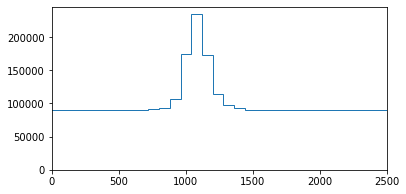

In [38]:

data=pairs_13_idler[:,1]
w=80

fig, ax = plt.subplots(figsize = (6,3))
_=ax.hist(data,bins=np.arange(min(data), max(data) + w, w),histtype='step')
plt.xlim([0,2500])




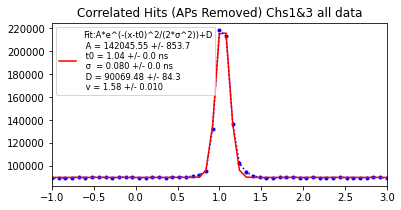

In [68]:
w=80
h13_idler=np.histogram(pairs_13_idler[:,1],bins=np.arange(-5000, 5000 + w, w))

bin_middles=(h13_idler[1][1:] + h13_idler[1][:-1])/2

nbins=125
x = np.linspace(-5,5,nbins+1)






fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h13_idler[0], p0 = [10000, 1, 1, 58000])
ax.plot(x[:-1], h13_idler[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
ax.set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])

In [47]:
triplets_123_idler_dt12=np.subtract(triplets_123_idler[:,1],triplets_123_idler[:,0])
triplets_123_idler_dt13=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,0])
triplets_123_idler_dt23=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,1])
triplets_123_signal_dt12=np.subtract(triplets_123_signal[:,1],triplets_123_signal[:,0])
triplets_123_signal_dt13=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,0])
triplets_123_signal_dt23=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,1])

(-2500.0, 4500.0)

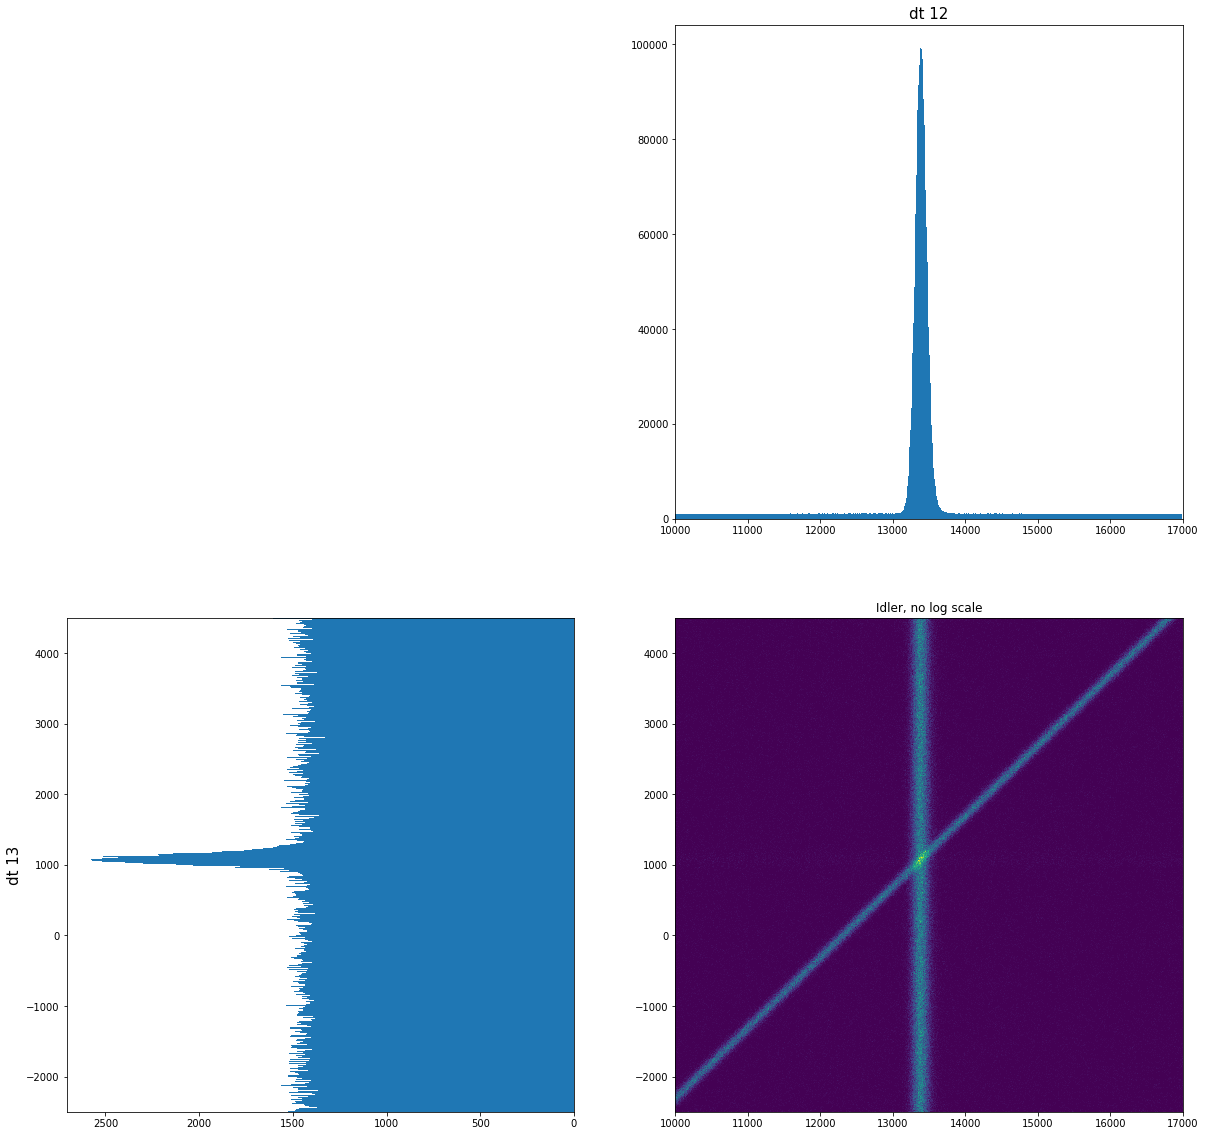

In [48]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_123_idler_dt12,triplets_123_idler_dt13,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(10000,17000)
ax[1,1].set_ylim(-2500,4500)


_=ax[0,1].hist(triplets_123_idler_dt12,bins=range(10000,17000,10),range=(10000,17000,10))
ax[0,1].set_xlim([10000,17000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(triplets_123_idler_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 13",fontsize=15)

ax[1,1].set_title("Idler, no log scale")
ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-2500,4500])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

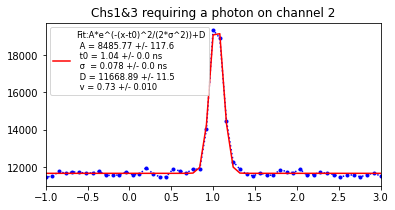

In [69]:
w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h13_from_triplets_idler=np.histogram(triplets_123_idler_dt13,bins=np.arange(-5000, 5000 + w, w))

fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Chs1&3 requiring a photon on channel 2')
best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax.plot(x[:-1], h13_from_triplets_idler[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
ax.set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13_w12"] = ((best_vals[1]))
globals()["sigma_13_w12"] = abs((best_vals[2]))
globals()["v_13_w12"] = abs(best_vals[0]/best_vals[3])

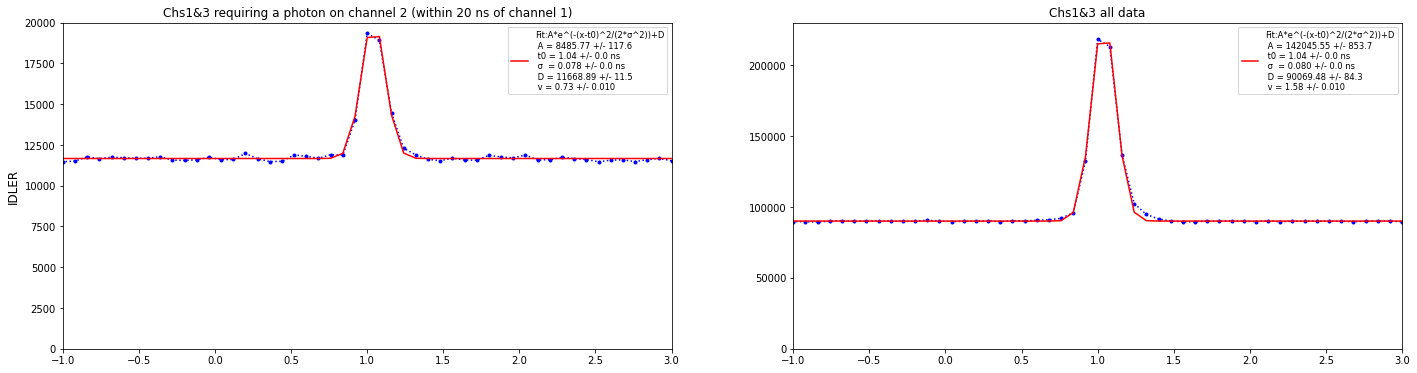

In [87]:
fig, ax = plt.subplots(ncols=2,figsize = (24,6))

ax[0].set_title('Chs1&3 requiring a photon on channel 2 (within 20 ns of channel 1)')
best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax[0].plot(x[:-1], h13_from_triplets_idler[0], 'b.:')
ax[0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0].legend(fontsize = 'small',loc='best')
ax[0].set_xlim(-1,3)
ax[0].set_ylim(0,20000)
globals()["t0_13_w12"] = ((best_vals[1]))
globals()["sigma_13_w12"] = abs((best_vals[2]))
globals()["v_13_w12"] = abs(best_vals[0]/best_vals[3])

ax[0].set_ylabel("IDLER",fontsize=12)

ax[1].set_title('Chs1&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h13_idler[0], p0 = [10000, 1, 1, 58000])
ax[1].plot(x[:-1], h13_idler[0], 'b.:')
ax[1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1].legend(fontsize = 'small',loc='best')
ax[1].set_xlim(-1,3)
ax[1].set_ylim(0,230000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])

Text(0.5, 0, 'dt,ns')

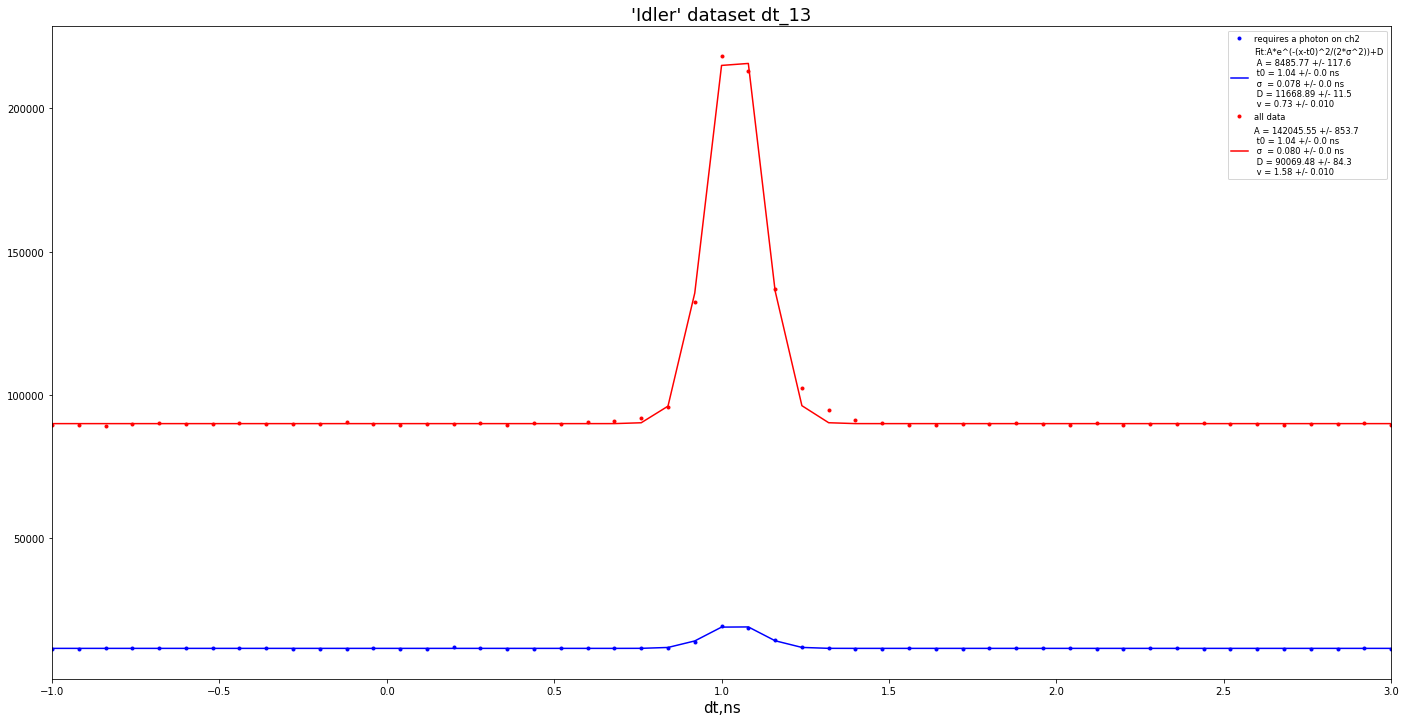

In [86]:
fig, ax = plt.subplots(figsize = (24,12))
                       
                       
                       

best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax.plot(x[:-1], h13_from_triplets_idler[0], 'b.',label='requires a photon on ch2')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'b-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
ax.set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13_w12"] = ((best_vals[1]))
globals()["sigma_13_w12"] = abs((best_vals[2]))
globals()["v_13_w12"] = abs(best_vals[0]/best_vals[3])



best_vals, covar = curve_fit(gauss, x[:-1], h13_idler[0], p0 = [10000, 1, 1, 58000])
ax.plot(x[:-1], h13_idler[0], 'r.',label='all data')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
ax.set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])

ax.set_title("'Idler' dataset dt_13",fontsize=18)
ax.set_xlabel("dt,ns",fontsize=15)

In [89]:
## 123

#signal

dt12_window_signal=np.logical_and(triplets_123_signal_dt12>13350- 83,triplets_123_signal_dt12<13350 + 83)



triplets_123_signal_12_peak_isolated=triplets_123_signal[dt12_window_signal]




#idler

dt12_window_idler=np.logical_and(triplets_123_idler_dt12>13350- 83*0.75,triplets_123_idler_dt12<13350+ 83*0.75)

triplets_123_idler_12_peak_isolated=triplets_123_idler[dt12_window_idler]






In [90]:

triplets_123_idler_dt13_12_peak_isolated=np.subtract(triplets_123_idler_12_peak_isolated[:,2],triplets_123_idler_12_peak_isolated[:,0])
triplets_123_signal_dt13_12_peak_isolated=np.subtract(triplets_123_signal_12_peak_isolated[:,2],triplets_123_signal_12_peak_isolated[:,0])

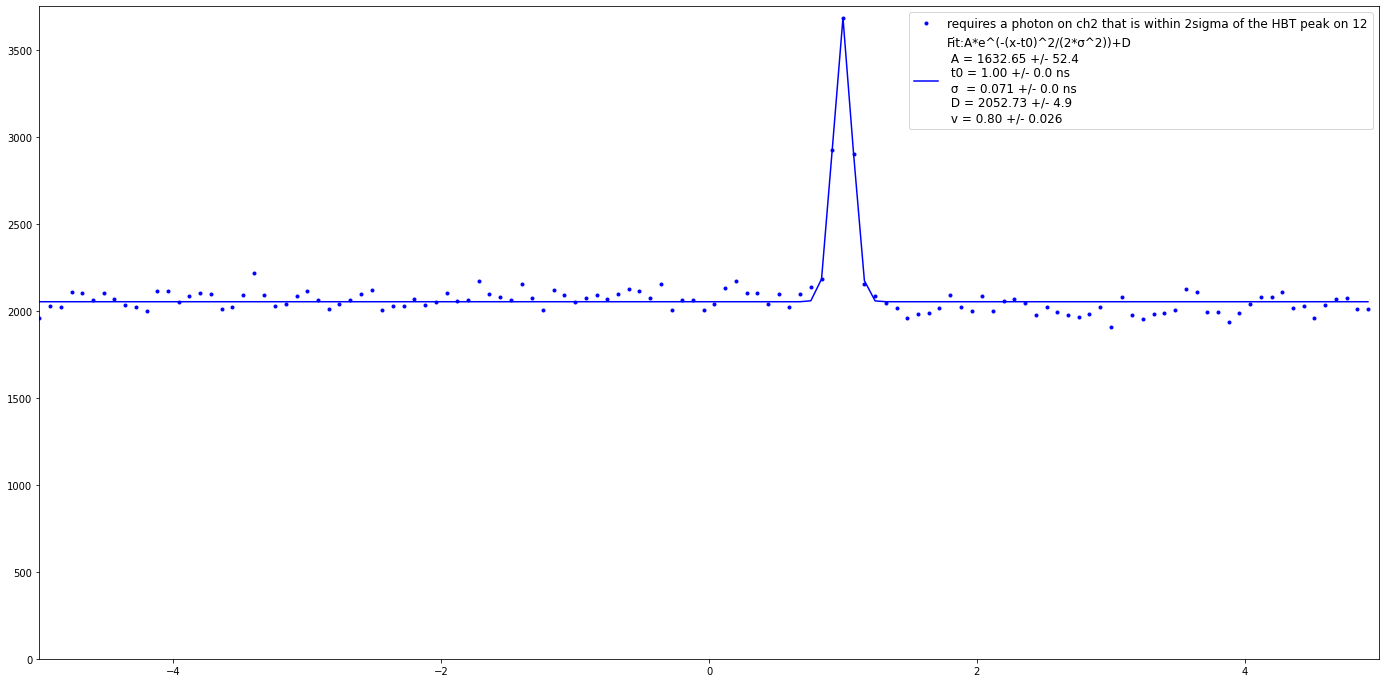

In [96]:
fig, ax = plt.subplots(figsize = (24,12))

w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h13_from_triplets_12_peak_isolated_idler=np.histogram(triplets_123_idler_dt13_12_peak_isolated,bins=np.arange(-5000, 5000 + w, w))


best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_12_peak_isolated_idler[0], p0 = [10000, 1, 0.08, 11000])
ax.plot(x[:-1], h13_from_triplets_12_peak_isolated_idler[0], 'b.',label='requires a photon on ch2 that is within 2sigma of the HBT peak on 12')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'b-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'large',loc='best')
ax.set_xlim(-5,5)
ax.set_ylim(0,3750)
globals()["t0_13_w12"] = ((best_vals[1]))
globals()["sigma_13_w12"] = abs((best_vals[2]))
globals()["v_13_w12"] = abs(best_vals[0]/best_vals[3])


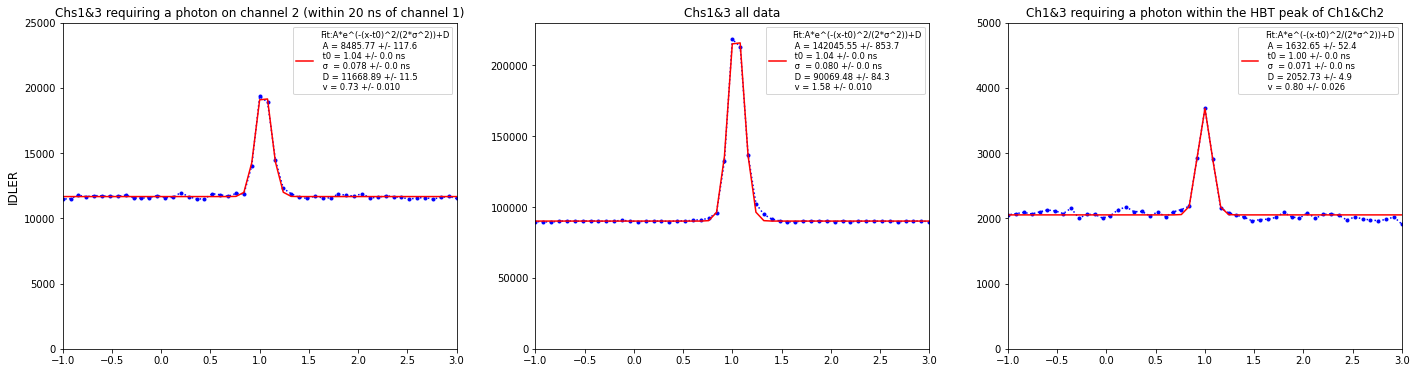

In [105]:
fig, ax = plt.subplots(ncols=3,figsize = (24,6))

ax[0].set_title('Chs1&3 requiring a photon on channel 2 (within 20 ns of channel 1)')
best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax[0].plot(x[:-1], h13_from_triplets_idler[0], 'b.:')
ax[0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0].legend(fontsize = 'small',loc='best')
ax[0].set_xlim(-1,3)
ax[0].set_ylim(0,25000)
globals()["t0_13_w12"] = ((best_vals[1]))
globals()["sigma_13_w12"] = abs((best_vals[2]))
globals()["v_13_w12"] = abs(best_vals[0]/best_vals[3])

ax[0].set_ylabel("IDLER",fontsize=12)

ax[1].set_title('Chs1&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h13_idler[0], p0 = [10000, 1, 1, 58000])
ax[1].plot(x[:-1], h13_idler[0], 'b.:')
ax[1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1].legend(fontsize = 'small',loc='best')
ax[1].set_xlim(-1,3)
ax[1].set_ylim(0,230000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])



best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_12_peak_isolated_idler[0], p0 = [10000, 1, 0.08, 11000])
ax[2].plot(x[:-1], h13_from_triplets_12_peak_isolated_idler[0], 'b.:')
ax[2].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[2].legend(fontsize = 'small',loc='best')
ax[2].set_xlim(-1,3)
ax[2].set_ylim(0,5000)
ax[2].set_title("Ch1&3 requiring a photon within the HBT peak of Ch1&Ch2")
globals()["t0_13_w12_isolated"] = ((best_vals[1]))
globals()["sigma_13_w12_isolated"] = abs((best_vals[2]))
globals()["v_13_w12_isolated"] = abs(best_vals[0]/best_vals[3])
